In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import shapiro
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('/Users/nisargab/Downloads/Manchester_house_Dataset[3678].csv')

In [3]:
df.head()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,waterfront,view,condition,grade,built,renovated,living_area
0,0,7129300520,221900,3.0,1.00,1180,5650,1.0,0,0,3,7,1955,0,1340
1,1,6414100192,538000,3.0,2.25,2570,7242,2.0,0,0,3,7,1951,1991,1690
2,2,5631500400,180000,2.0,1.00,770,10000,1.0,0,0,3,6,1933,0,2720
3,3,2487200875,604000,4.0,3.00,1960,5000,1.0,0,0,5,7,1965,0,1360
4,4,1954400510,510000,3.0,2.00,1680,8080,1.0,0,0,3,8,1987,0,1800


In [4]:
df = df.drop(df.columns[0], axis=1)

In [5]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,waterfront,view,condition,grade,built,renovated,living_area
0,7129300520,221900,3.0,1.00,1180,5650,1.0,0,0,3,7,1955,0,1340
1,6414100192,538000,3.0,2.25,2570,7242,2.0,0,0,3,7,1951,1991,1690
2,5631500400,180000,2.0,1.00,770,10000,1.0,0,0,3,6,1933,0,2720
3,2487200875,604000,4.0,3.00,1960,5000,1.0,0,0,5,7,1965,0,1360
4,1954400510,510000,3.0,2.00,1680,8080,1.0,0,0,3,8,1987,0,1800


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           19999 non-null  int64  
 1   price        19999 non-null  int64  
 2   bedrooms     19986 non-null  float64
 3   bathrooms    19989 non-null  float64
 4   sqft_living  19999 non-null  int64  
 5   sqft_total   19999 non-null  int64  
 6   floors       19999 non-null  float64
 7   waterfront   19999 non-null  int64  
 8   view         19999 non-null  int64  
 9   condition    19999 non-null  int64  
 10  grade        19999 non-null  int64  
 11  built        19999 non-null  int64  
 12  renovated    19999 non-null  int64  
 13  living_area  19999 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.1 MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,19999.0,4.569212e+09,2.866327e+09,1000102.0,2.123049e+09,3.905080e+09,7.300300e+09,9.900000e+09
price,19999.0,5.354680e+05,3.659566e+05,75000.0,3.170000e+05,4.499500e+05,6.400000e+05,7.700000e+06
bedrooms,19986.0,3.366607e+00,9.301035e-01,1.0,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,19989.0,2.072978e+00,7.611442e-01,0.5,1.500000e+00,2.000000e+00,2.500000e+00,8.000000e+00
sqft_living,19999.0,2.057888e+03,9.056440e+02,290.0,1.420000e+03,1.900000e+03,2.510000e+03,1.354000e+04
sqft_total,19999.0,1.560700e+04,4.177119e+04,520.0,5.350000e+03,7.819000e+03,1.100000e+04,1.651359e+06
floors,19999.0,1.444872e+00,5.166723e-01,1.0,1.000000e+00,1.000000e+00,2.000000e+00,3.500000e+00
waterfront,19999.0,7.950398e-03,8.881207e-02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,19999.0,2.417621e-01,7.779232e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,19999.0,3.441772e+00,6.654633e-01,1.0,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [8]:
df.isnull().sum()

id              0
price           0
bedrooms       13
bathrooms      10
sqft_living     0
sqft_total      0
floors          0
waterfront      0
view            0
condition       0
grade           0
built           0
renovated       0
living_area     0
dtype: int64

In [9]:
#To check for the normal distribution
variables = ['bedrooms', 'bathrooms']

for var in variables:
    # Perform Shapiro-Wilk Test (drop NaNs)
    stat, p = shapiro(df[var].dropna())
    
    # Print results with interpretation
    print(f"--- {var.upper()} ---")
    print(f"Shapiro-Wilk Test Statistic: {stat:.4f}")
    print(f"p-value: {p:.4e}")
    
    if p < 0.05:
        print(f"Interpretation: p-value < 0.05 → Reject null hypothesis → {var} is NOT normally distributed.\n")
    else:
        print(f"Interpretation: p-value ≥ 0.05 → Fail to reject null hypothesis → {var} IS normally distributed.\n")


--- BEDROOMS ---
Shapiro-Wilk Test Statistic: 0.8434
p-value: 6.2274e-87
Interpretation: p-value < 0.05 → Reject null hypothesis → bedrooms is NOT normally distributed.

--- BATHROOMS ---
Shapiro-Wilk Test Statistic: 0.9324
p-value: 1.9721e-68
Interpretation: p-value < 0.05 → Reject null hypothesis → bathrooms is NOT normally distributed.



In [10]:
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)

In [11]:
df.isnull().sum()

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_total     0
floors         0
waterfront     0
view           0
condition      0
grade          0
built          0
renovated      0
living_area    0
dtype: int64

In [12]:
df['bedrooms'] = df['bedrooms'].round().astype('int')
df['floors'] = df['floors'].round().astype('int')
df['bathrooms'] = df['bathrooms'].round(2)

In [13]:
df.dtypes

id               int64
price            int64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_total       int64
floors           int64
waterfront       int64
view             int64
condition        int64
grade            int64
built            int64
renovated        int64
living_area      int64
dtype: object

In [14]:

df.duplicated().sum()

np.int64(2)

In [15]:
df[df.duplicated()]

,id,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,waterfront,view,condition,grade,built,renovated,living_area
3951,1825069031,550000,4,1.75,2410,8447,2,0,3,4,8,1936,1980,2520
14983,6308000010,585000,3,2.50,2290,5089,2,0,0,3,9,2001,0,2290


In [16]:
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df[df.duplicated(subset='id', keep=False)].sort_values('id')

,id,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,waterfront,view,condition,grade,built,renovated,living_area
2496,1000102,280000,6,3.00,2400,9373,2,0,0,3,7,1991,0,2060
2497,1000102,300000,6,3.00,2400,9373,2,0,0,3,7,1991,0,2060
16815,7200179,175000,2,1.00,840,12750,1,0,0,3,6,1925,0,1480
16814,7200179,150000,2,1.00,840,12750,1,0,0,3,6,1925,0,1480
11433,109200390,245000,3,1.75,1480,3900,1,0,0,4,7,1980,0,1830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,9828200460,430000,2,1.00,700,4800,1,0,0,3,7,1922,0,1440
15199,9834200305,350000,3,1.00,1790,3876,2,0,0,5,7,1904,0,1360
15200,9834200305,615000,3,1.00,1790,3876,2,0,0,5,7,1904,0,1360
1085,9834200885,360000,4,2.50,2080,4080,1,0,0,5,7,1962,0,1340


In [19]:
df = df.loc[df.groupby('id')['price'].idxmax()]

In [20]:
df['id'].duplicated().sum()

np.int64(0)

In [21]:
def iqr_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers, lower, upper

In [22]:
outliers_price, low_p, up_p = iqr_outliers(df, 'price')
print(f"Price outliers count: {len(outliers_price)}")
outliers_sqftliving, low_s, up_s = iqr_outliers(df, 'sqft_living')
print(f"Sqft living outliers count: {len(outliers_sqftliving)}")
outliers_sqfttotal, low_st, up_st = iqr_outliers(df, 'sqft_total')
print(f"Sqft total outliers count: {len(outliers_sqfttotal)}")
outliers_livingarea, low_l, up_l = iqr_outliers(df, 'living_area')
print(f"Living area outliers count: {len(outliers_livingarea)}")
outliers_bedrooms, low_b, up_b = iqr_outliers(df, 'bedrooms')
print(f"Bedroom outliers count: {len(outliers_bedrooms)}")
outliers_bathrooms, low_ba, up_ba = iqr_outliers(df, 'bathrooms')
print(f"Bathroom outliers count: {len(outliers_bathrooms)}")
outliers_floors, low_f, up_f = iqr_outliers(df, 'floors')
print(f"Floor outliers count: {len(outliers_floors)}")

Price outliers count: 1048
Sqft living outliers count: 549
Sqft total outliers count: 2316
Living area outliers count: 525
Bedroom outliers count: 499
Bathroom outliers count: 229
Floor outliers count: 6


In [23]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    return df[(df[column] >= lower) & (df[column] <= upper)]

In [24]:
df_clean = remove_outliers(df, 'price')
df_clean = remove_outliers(df_clean, 'sqft_living')

In [25]:

before_corr, _ = spearmanr(df['sqft_living'], df['price'])
after_corr, _ = spearmanr(df_clean['sqft_living'], df_clean['price'])

print(f"Before outlier removal: {before_corr:.2f}")
print(f"After outlier removal: {after_corr:.2f}")


Before outlier removal: 0.64
After outlier removal: 0.58


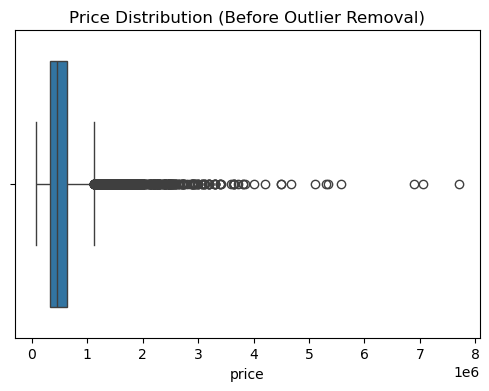

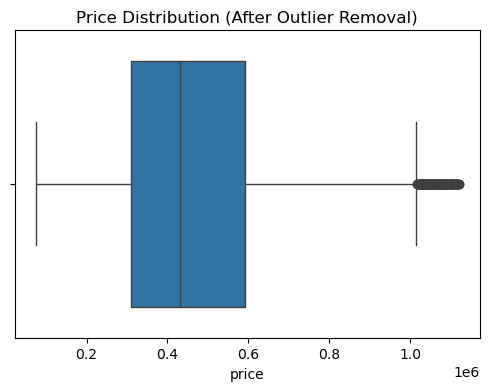

In [26]:

# Before outlier removal
plt.figure(figsize=(6,4))
sns.boxplot(x=df['price'])
plt.title('Price Distribution (Before Outlier Removal)')
plt.savefig("Price Distribution (Before Outlier Removal).png")
plt.show()

# After outlier removal
plt.figure(figsize=(6,4))
sns.boxplot(x=df_clean['price'])
plt.title('Price Distribution (After Outlier Removal)')
plt.savefig("Price Distribution (After Outlier Removal).png")
plt.show()


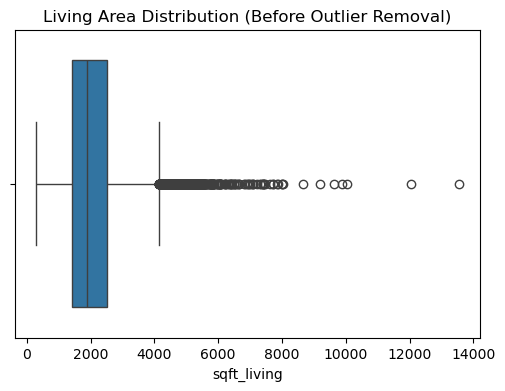

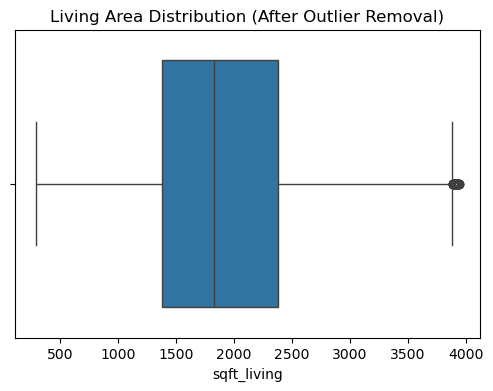

In [27]:
# Before outlier removal
plt.figure(figsize=(6,4))
sns.boxplot(x=df['sqft_living'])
plt.title('Living Area Distribution (Before Outlier Removal)')
plt.savefig("Living Area Distribution (Before Outlier Removal).png")
plt.show()

# After outlier removal
plt.figure(figsize=(6,4))
sns.boxplot(x=df_clean['sqft_living'])
plt.title('Living Area Distribution (After Outlier Removal)')
plt.savefig("Living Area Distribution (After Outlier Removal).png")
plt.show()


In [28]:
df_clean.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,waterfront,view,condition,grade,built,renovated,living_area
2497,1000102,300000,6,3.00,2400,9373,2,0,0,3,7,1991,0,2060
6735,1200019,647500,4,1.75,2060,26036,1,0,0,4,8,1947,0,2590
8411,1200021,400000,3,1.00,1460,43000,1,0,0,3,7,1952,0,2250
8809,2800031,235000,3,1.00,1430,7599,2,0,0,4,6,1930,0,1290
3557,3600057,402500,4,2.00,1650,3504,1,0,0,3,7,1951,2013,1480


In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18489 entries, 2497 to 15951
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           18489 non-null  int64  
 1   price        18489 non-null  int64  
 2   bedrooms     18489 non-null  int64  
 3   bathrooms    18489 non-null  float64
 4   sqft_living  18489 non-null  int64  
 5   sqft_total   18489 non-null  int64  
 6   floors       18489 non-null  int64  
 7   waterfront   18489 non-null  int64  
 8   view         18489 non-null  int64  
 9   condition    18489 non-null  int64  
 10  grade        18489 non-null  int64  
 11  built        18489 non-null  int64  
 12  renovated    18489 non-null  int64  
 13  living_area  18489 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 2.1 MB


In [30]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
id,18489.0,4.602772e+09,2.867908e+09,1000102.0,2.141310e+09,3.959401e+09,7.334401e+09,9.900000e+09
price,18489.0,4.686832e+05,2.024905e+05,75000.0,3.100000e+05,4.310000e+05,5.925000e+05,1.120000e+06
bedrooms,18489.0,3.308832e+00,9.002190e-01,1.0,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,18489.0,1.991333e+00,6.804899e-01,0.5,1.500000e+00,2.000000e+00,2.500000e+00,5.750000e+00
sqft_living,18489.0,1.920348e+03,7.023787e+02,290.0,1.380000e+03,1.830000e+03,2.380000e+03,3.940000e+03
sqft_total,18489.0,1.456132e+04,3.868590e+04,520.0,5.200000e+03,7.680000e+03,1.048800e+04,1.651359e+06
floors,18489.0,1.465845e+00,5.353514e-01,1.0,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
waterfront,18489.0,3.245173e-03,5.687545e-02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,18489.0,1.751312e-01,6.449772e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,18489.0,3.442750e+00,6.629551e-01,1.0,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


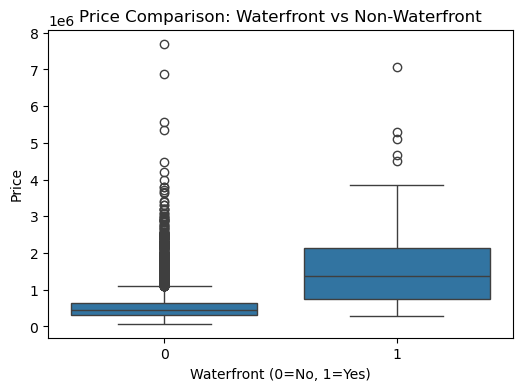

Average Prices:
 waterfront
0    5.282238e+05
1    1.633892e+06
Name: price, dtype: float64


In [31]:
# Boxplot: Price vs Waterfront
plt.figure(figsize=(6,4))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Price Comparison: Waterfront vs Non-Waterfront')
plt.xlabel('Waterfront (0=No, 1=Yes)')
plt.ylabel('Price')
plt.savefig("Price Comparison: Waterfront vs Non-Waterfront.png")
plt.show()


# Average prices
waterfront_avg = df.groupby('waterfront')['price'].mean()
print("Average Prices:\n", waterfront_avg)

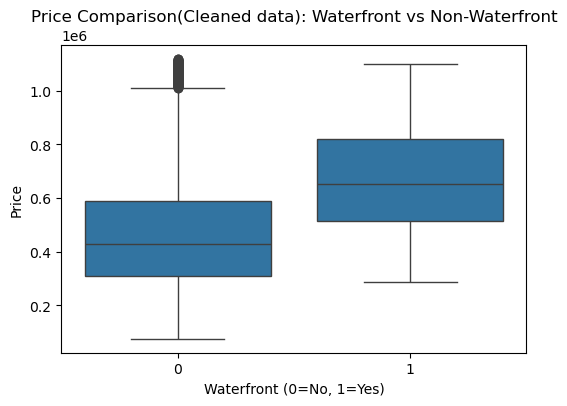

Average Prices:
 waterfront
0    468035.294319
1    667690.700000
Name: price, dtype: float64


In [32]:
# Boxplot: Price vs Waterfront
plt.figure(figsize=(6,4))
sns.boxplot(x='waterfront', y='price', data=df_clean)
plt.title('Price Comparison(Cleaned data): Waterfront vs Non-Waterfront')
plt.xlabel('Waterfront (0=No, 1=Yes)')
plt.ylabel('Price')
plt.savefig("Price Comparison(Cleaned data): Waterfront vs Non-Waterfront.png")
plt.show()


# Average prices
waterfront_avg = df_clean.groupby('waterfront')['price'].mean()
print("Average Prices:\n", waterfront_avg)

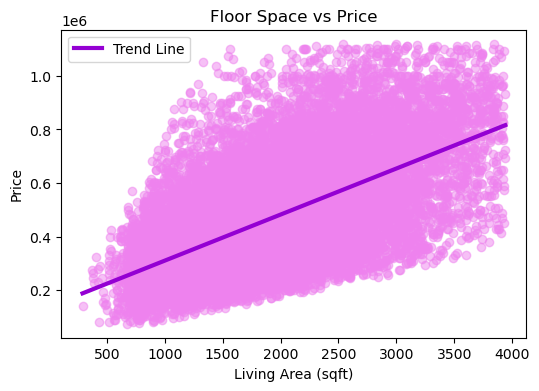

Spearman correlation (sqft_living vs price) after outlier removal: 0.58


In [35]:
plt.figure(figsize=(6,4))

# Use sns.regplot instead of scatterplot to enable the trend line
sns.regplot(
    x='sqft_living', 
    y='price', 
    data=df_clean, 
    scatter_kws={'alpha': 0.5},                    # Settings for the dots
    line_kws={'color': 'darkviolet', 'lw': 3, 'label': 'Trend Line'}, # Settings for the line
    color='violet'
)

plt.title('Floor Space vs Price')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.legend()  # Displays the 'Trend Line' label
plt.savefig("Floor Space vs Price.png")
plt.show()

# Spearman correlation (floor space vs price)
corr, _ = spearmanr(df_clean['sqft_living'], df_clean['price'])
print(f"Spearman correlation (sqft_living vs price) after outlier removal: {corr:.2f}")

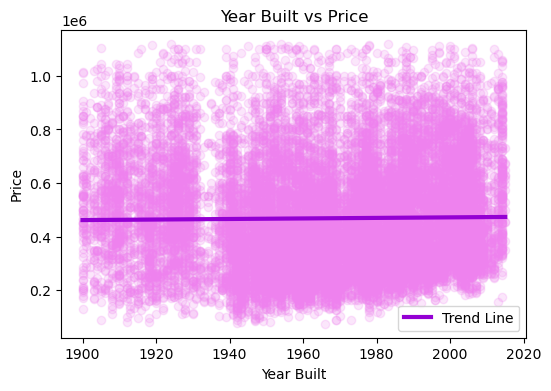

Spearman correlation (built vs price): 0.08


In [36]:
plt.figure(figsize=(6,4))

# Use line_kws to make the regression line thicker and more distinct
sns.regplot(
    x='built', 
    y='price', 
    data=df_clean, 
    scatter_kws={'alpha':0.2}, 
    line_kws={'color': 'darkviolet', 'lw': 3, 'label': 'Trend Line'}, # Highlighted line
    color='violet'
)

plt.title('Year Built vs Price')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.legend() # Optional: shows the label for the line
plt.savefig("Year Built vs Price.png")
plt.show()

corr_built, _ = spearmanr(df['built'], df['price'])
print(f"Spearman correlation (built vs price): {corr_built:.2f}")

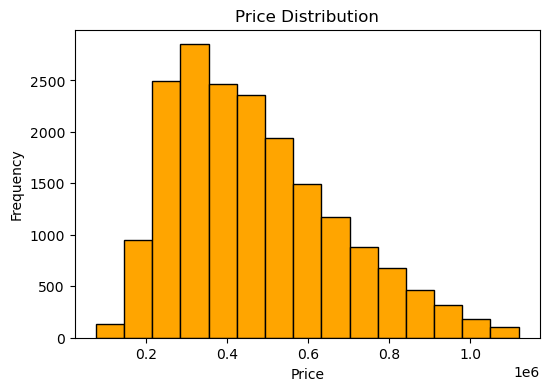

In [37]:
#price histogram

plt.figure(figsize=(6,4))
plt.hist(df_clean['price'], bins=int(1 + 3.322 * np.log10(len(df_clean))), edgecolor='black' , color='orange')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.savefig("Price Distribution.png")
plt.show()


In [38]:
df_clean['price'].mean()

np.float64(468683.2106117151)

In [39]:
df_clean['price'].max()

1120000

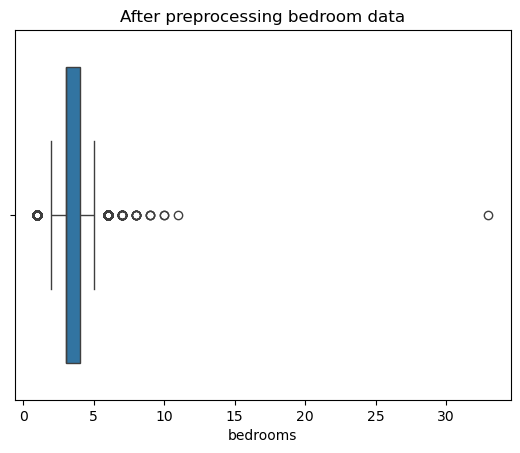

In [40]:
sns.boxplot(x=df_clean['bedrooms'])
plt.title('After preprocessing bedroom data')
plt.savefig("After preprocessing.png")
plt.show()


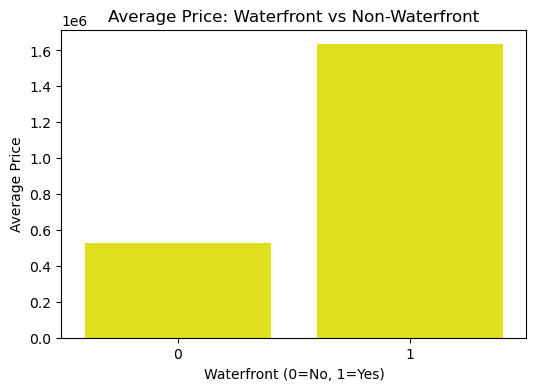

In [41]:
waterfront_avg = df.groupby('waterfront')['price'].mean()
plt.figure(figsize=(6,4))
sns.barplot(x=waterfront_avg.index, y=waterfront_avg.values , color='yellow')
plt.title('Average Price: Waterfront vs Non-Waterfront')
plt.xlabel('Waterfront (0=No, 1=Yes)')
plt.ylabel('Average Price')
plt.savefig("Average Price: Waterfront vs Non-Waterfront.png")
plt.show()


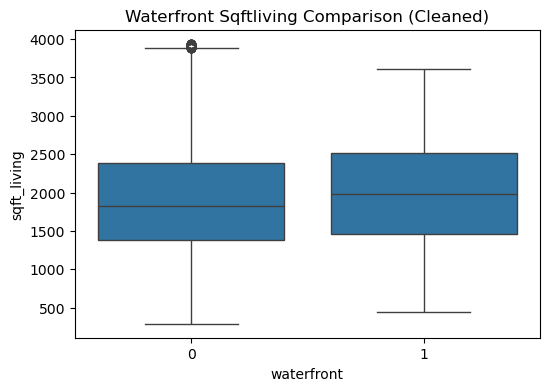

In [42]:
# Waterfront vs sqft_living (boxplot)
plt.figure(figsize=(6,4))
sns.boxplot(x='waterfront', y='sqft_living', data=df_clean )
plt.title('Waterfront Sqftliving Comparison (Cleaned)')
plt.savefig("Waterfront Sqftliving Comparison (Cleaned).png")
plt.show()


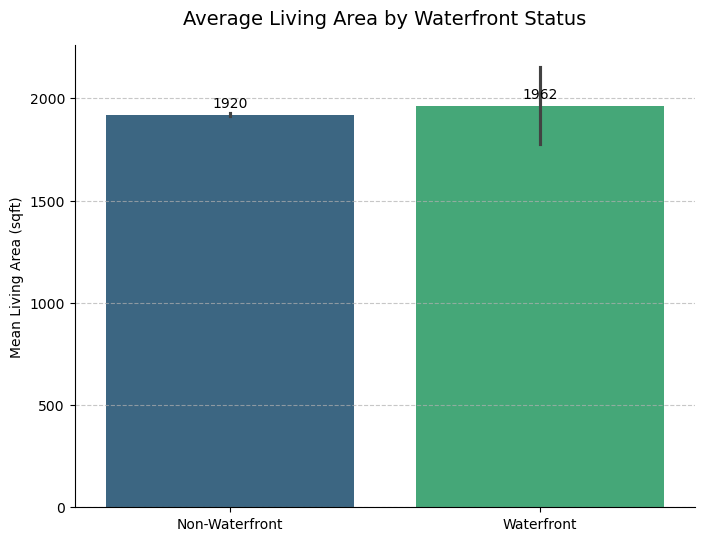

In [48]:
plt.figure(figsize=(8, 6))

# Use a specific palette and adjust width for a cleaner look
ax = sns.barplot(
    x='waterfront', 
    y='sqft_living', 
    data=df_clean, 
    palette='viridis', 
    hue='waterfront', 
    legend=False
)

# Add data labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.title('Average Living Area by Waterfront Status', fontsize=14, pad=15)
plt.xticks([0, 1], ['Non-Waterfront', 'Waterfront']) # Clearer labels than 0 and 1
plt.xlabel('') # Remove redundant label
plt.ylabel('Mean Living Area (sqft)')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add light gridlines for scale
sns.despine() # Remove the top and right borders

plt.savefig("Average_Living_Area.png", bbox_inches='tight')
plt.show()

In [44]:
corr_waterfront = df[df['waterfront'] == 1][['price','sqft_living','sqft_total']].corr()
print("Correlation matrix for waterfront properties:\n", corr_waterfront)

Correlation matrix for waterfront properties:
                 price  sqft_living  sqft_total
price        1.000000     0.878110   -0.031921
sqft_living  0.878110     1.000000    0.030928
sqft_total  -0.031921     0.030928    1.000000


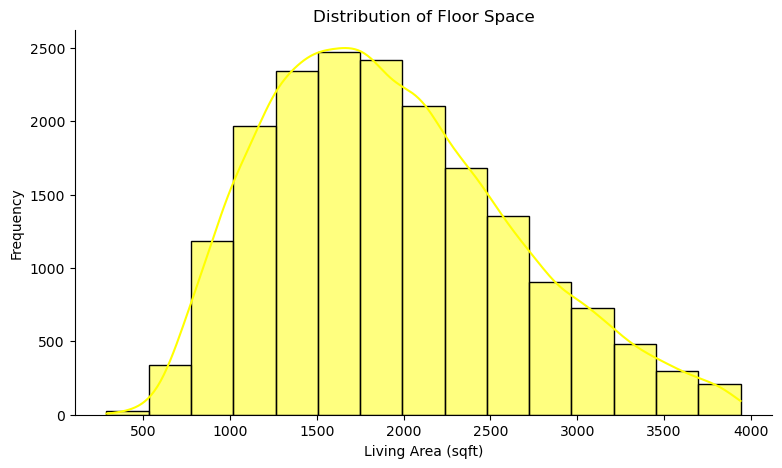

In [53]:
plt.figure(figsize=(9, 5))
sns.histplot(df_clean['sqft_living'], kde=True, color='yellow' , bins=int(1 + 3.322 * np.log10(len(df_clean))), )

plt.title('Distribution of Floor Space')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Frequency')
sns.despine()
plt.savefig("Distribution of Floor Space.png")
plt.show()

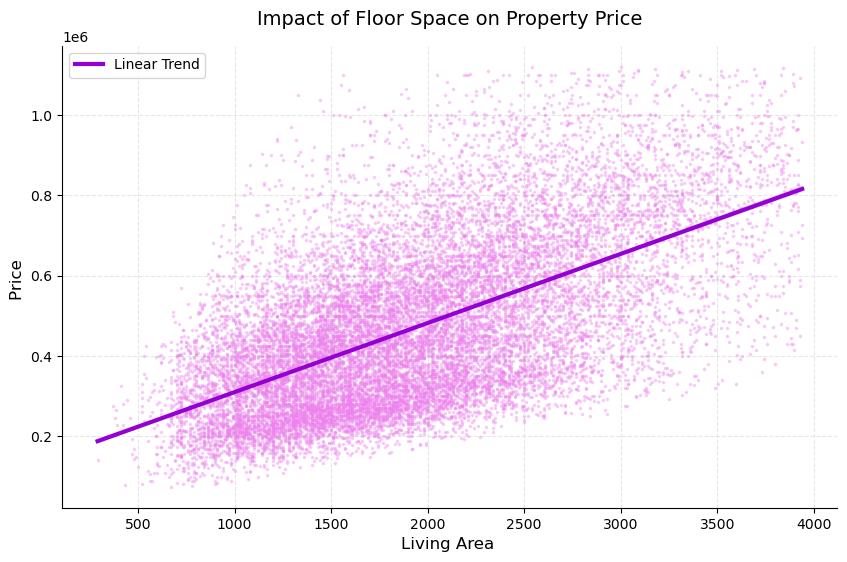

In [55]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='sqft_living', 
    y='price', 
    data=df_clean, 
    scatter_kws={'alpha': 0.3, 'color': 'violet', 's': 10}, 
    line_kws={'color': 'darkviolet', 'lw': 3, 'label': 'Linear Trend'},
    marker='.'
)

plt.title('Impact of Floor Space on Property Price', fontsize=14, pad=15)
plt.xlabel('Living Area ', fontsize=12)
plt.ylabel('Price ', fontsize=12)
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.3)
sns.despine()
plt.savefig("FloorSpace vs Price.png", bbox_inches='tight')
plt.show()

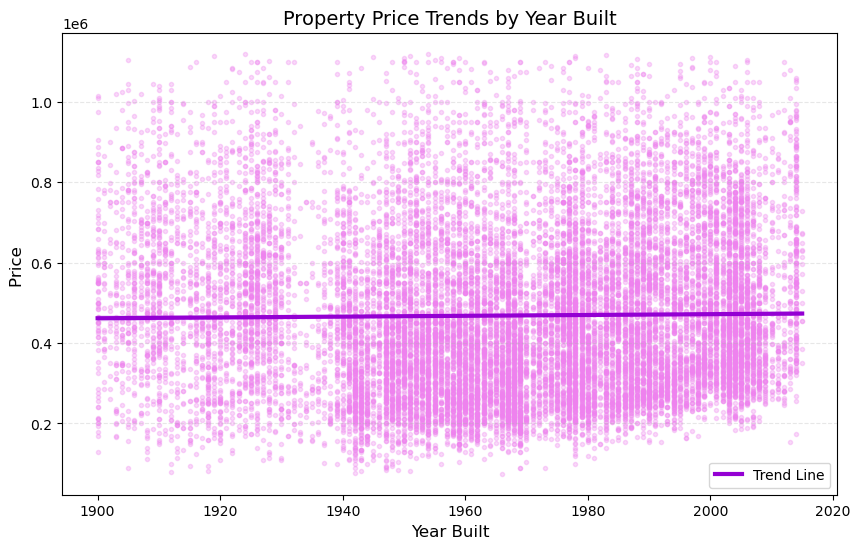

In [58]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='built', 
    y='price', 
    data=df_clean, 
    scatter_kws={'alpha': 0.3, 'color': 'violet'}, 
    line_kws={'color': 'darkviolet', 'lw': 3, 'label': 'Trend Line'},
    marker='.'
)

plt.title('Property Price Trends by Year Built', fontsize=14)
plt.xlabel('Year Built', fontsize=12)
plt.ylabel('Price ', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend()
plt.savefig("Year built vs Price.png", bbox_inches='tight')
plt.show()

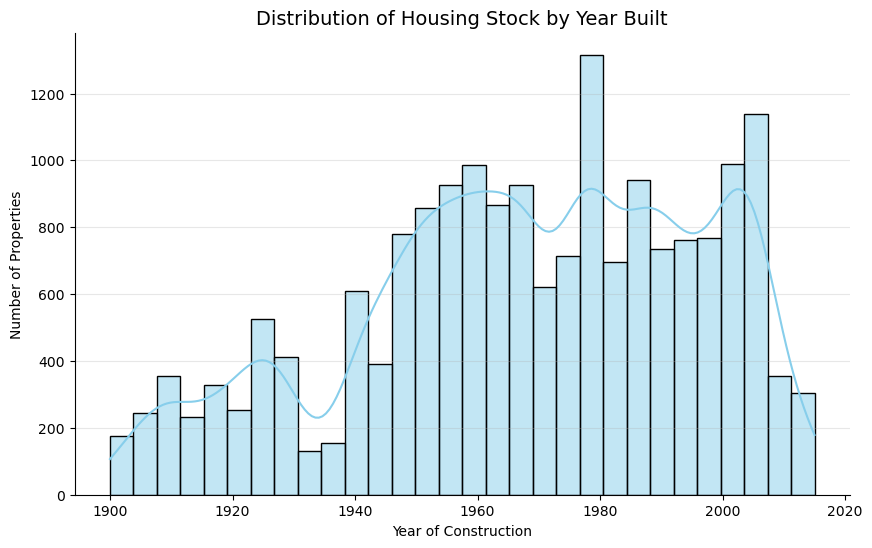

In [59]:
plt.figure(figsize=(10, 6))

# Histogram of Year Built with a KDE curve
sns.histplot(df_clean['built'], kde=True, color='skyblue', bins=30)

plt.title('Distribution of Housing Stock by Year Built', fontsize=14)
plt.xlabel('Year of Construction')
plt.ylabel('Number of Properties')
plt.grid(axis='y', alpha=0.3)
sns.despine()

plt.savefig("Year Built Histogram.png", bbox_inches='tight')
plt.show()

In [45]:
from sklearn.linear_model import LinearRegression

X = df_clean[['sqft_living','waterfront','grade','bathrooms']]
y = df_clean['price']

model = LinearRegression()
model.fit(X, y)

coeff = pd.DataFrame({
    'Feature': X.columns,
    'Impact': model.coef_
})
print(coeff.sort_values(by='Impact', ascending=False))

       Feature         Impact
1   waterfront  210082.354374
2        grade   77666.137099
0  sqft_living     110.511762
3    bathrooms  -21924.476573


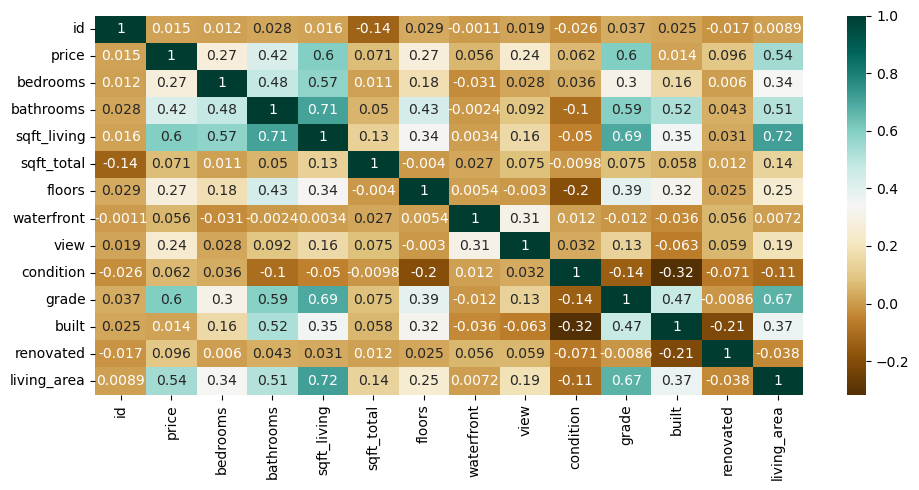

In [46]:
plt.figure(figsize=(10,5))
corr=df_clean.corr()
sns.heatmap(corr,cmap = 'BrBG' , annot = True)
plt.tight_layout()
plt.savefig("Heat map")